In [19]:
from biomasstry.datasets import TemporalSentinel1Dataset, TemporalSentinel2Dataset
from biomasstry.models import UTAE
import matplotlib.pyplot as plt

In [10]:
S3_DIRECT = True  # Access S3 directly or as a mounted data source
if S3_DIRECT:
    data_url="s3://drivendata-competition-biomassters-public-us"
else:
    data_url = ""

## Sentinel-1 Dataset

In [11]:
dsa = TemporalSentinel1Dataset(data_url=data_url, bands=["VVA", "VHA"])
dsd = TemporalSentinel1Dataset(data_url=data_url, bands=["VVD", "VHD"])
ds1 = TemporalSentinel1Dataset(data_url=data_url)

In [12]:
# Sammple data
a = dsa[0]
d = dsd[0]
s1 = ds1[0]

In [13]:
print(f"Ascending: Size: {a['image'].size()}, Band Indexes: {dsa.band_indexes}")
print(f"Descending: Size: {d['image'].size()}, Band Indexes: {dsd.band_indexes}")
print(f"Full Sentinel-1: Size: {s1['image'].size()}, Band Indexes: {ds1.band_indexes}")

Ascending: Size: torch.Size([6, 2, 256, 256]), Band Indexes: [1, 2]
Descending: Size: torch.Size([6, 2, 256, 256]), Band Indexes: [3, 4]
Full Sentinel-1: Size: torch.Size([6, 4, 256, 256]), Band Indexes: [1, 2, 3, 4]


## Sentinel-2 Dataset

In [3]:
dsrgb = TemporalSentinel2Dataset(data_url=data_url, bands=["B2", "B3", "B4"])
dsir1 = TemporalSentinel2Dataset(data_url=data_url, bands=["B5", "B6", "B7", "B8", "B8A"])
dsir2 = TemporalSentinel2Dataset(data_url=data_url, bands=["B11", "B12"])
ds2 = TemporalSentinel2Dataset(data_url=data_url)

In [4]:
# Sammple data
rgb = dsrgb[0]
ir1 = dsir1[0]
ir2 = dsir2[0]
s2 = ds2[0]

In [5]:
print(f"RGB: Size: {rgb['image'].size()}, Band Indexes: {dsrgb.band_indexes}")
print(f"IR1: Size: {ir1['image'].size()}, Band Indexes: {dsir1.band_indexes}")
print(f"IR2: Size: {ir2['image'].size()}, Band Indexes: {dsir2.band_indexes}")
print(f"Full Sentinel-2: Size: {s2['image'].size()}, Band Indexes: {ds2.band_indexes}")

RGB: Size: torch.Size([5, 3, 256, 256]), Band Indexes: [1, 2, 3]
IR1: Size: torch.Size([5, 5, 256, 256]), Band Indexes: [4, 5, 6, 7, 8]
IR2: Size: torch.Size([5, 2, 256, 256]), Band Indexes: [9, 10]
Full Sentinel-2: Size: torch.Size([5, 10, 256, 256]), Band Indexes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [6]:
ds2.band_map

{'B2': 1,
 'B3': 2,
 'B4': 3,
 'B5': 4,
 'B6': 5,
 'B7': 6,
 'B8': 7,
 'B8A': 8,
 'B11': 9,
 'B12': 10,
 'CLP': 11}

## Model

In [8]:
# Input channels: 2 for S1-A or S1-D; 4 for S1; 10 for S2
input_nc = 2
model = UTAE(input_nc)

In [15]:
y = model(a['image'].unsqueeze(0))

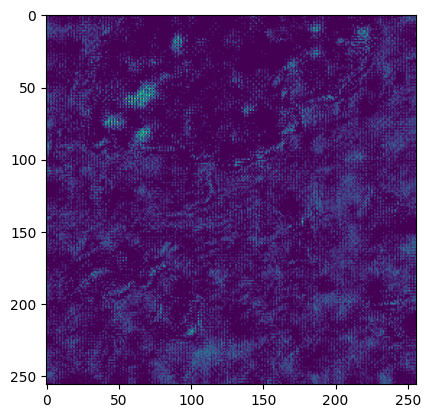

In [22]:
plt.imshow(y.squeeze().detach().numpy())
plt.show()

In [23]:
a['chip_id']

'0003d2eb'